Playing original audio:


Playing processed audio:


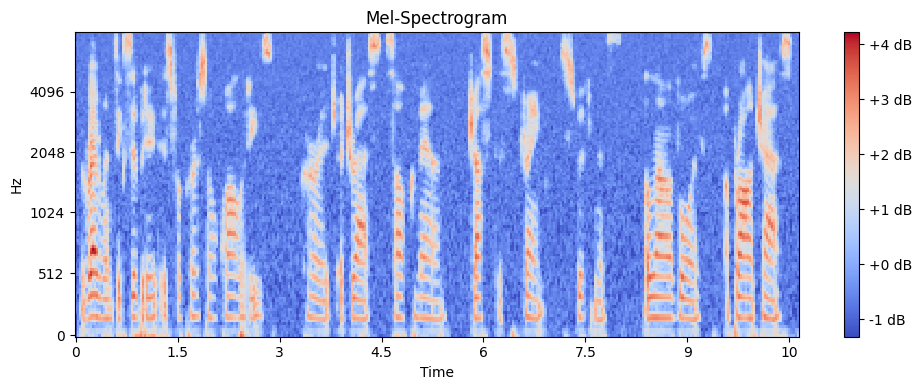

Processed and saved Mel-Spectrogram, MFCC, and audio for 102_129232_000036_000005.wav
Audio processing complete for one file.


In [ ]:

import librosa
import noisereduce as nr
import numpy as np
import os
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio, display

input_file = '/kaggle/input/audio-data/processed_audio_1.1/102_129232_000036_000005.wav'
output_dir = '/kaggle/working/'

os.makedirs(output_dir, exist_ok=True)
def preprocess_audio(audio_file):
    # Load audio using librosa at 16kHz
    audio, sr = librosa.load(audio_file, sr=16000)

    # Apply basic noise reduction
    audio = nr.reduce_noise(y=audio, sr=sr)

    # Normalize audio for consistent loudness
    audio = librosa.util.normalize(audio)

    # Loudness enhancement
    audio = audio * 0.5

    # Remove silence (trim leading and trailing silence)
    audio, _ = librosa.effects.trim(audio)

    # Resample if needed
    if sr != 16000:
        audio = librosa.resample(audio, sr, 16000)

    # Convert stereo to mono if needed
    if len(audio.shape) > 1:
        audio = librosa.to_mono(audio)

    return audio, sr


def generate_mel_spectrogram(audio, sr):
    n_fft = min(len(audio), 1024)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000, n_fft=n_fft)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram_db = (mel_spectrogram_db - np.mean(mel_spectrogram_db)) / np.std(mel_spectrogram_db)
    return mel_spectrogram_db


def generate_mfcc(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)
    return mfcc

# Data Augmentation Function (Noise Injection)
def add_noise(audio, noise_factor=0.001):
    noise = np.random.randn(len(audio))
    audio_noisy = audio + noise_factor * noise
    return np.clip(audio_noisy, -1, 1)

# Feature extraction techniques
def extract_features(audio, sr):
    mel_spectrogram = generate_mel_spectrogram(audio, sr)
    mfcc = generate_mfcc(audio, sr)
    return mel_spectrogram, mfcc

def process_audio_file(audio_file, output_dir):
    filename = os.path.basename(audio_file)

    # Load and play the original audio
    audio, sr = librosa.load(audio_file, sr=16000)
    print("Playing original audio:")
    display(Audio(audio, rate=sr))

    # Preprocess the audio file
    audio, sr = preprocess_audio(audio_file)

    # Data augmentation (Noise Injection)
    audio = add_noise(audio, noise_factor=0.001)

    # Extract features from the audio (Mel-Spectrogram and MFCC)
    mel_spectrogram_db, mfcc = extract_features(audio, sr)

    # Save the Mel-Spectrogram as a compressed .npz file
    mel_output_file_path = os.path.join(output_dir, filename.replace('.wav', '_mel.npz'))
    np.savez_compressed(mel_output_file_path, mel_spectrogram_db)

    # Save the MFCC features as a compressed .npz file
    mfcc_output_file_path = os.path.join(output_dir, filename.replace('.wav', '_mfcc.npz'))
    np.savez_compressed(mfcc_output_file_path, mfcc)

    # Save the preprocessed audio as a .wav file
    audio_output_file_path = os.path.join(output_dir, filename.replace('.wav', '_preprocessed.wav'))
    sf.write(audio_output_file_path, audio, sr)

    print("Playing processed audio:")
    display(Audio(audio, rate=sr))

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
    plt.title('Mel-Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename.replace('.wav', '_mel_spectrogram.png')))
    plt.show()

    print(f"Processed and saved Mel-Spectrogram, MFCC, and audio for {filename}")


process_audio_file(input_file, output_dir)
print("Audio processing complete for one file.")



# **Audio Preprocessing**

In [ ]:
audio_dir = '/kaggle/input/audio-data/processed_audio_1.1'
text_dir = '/kaggle/input/text-data/processed_text_1.1'
output_dir = '/Users/abdullah/Desktop/split'


os.makedirs(output_dir, exist_ok=True)
def get_audio_files(directory):
    audio_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.wav'):
                audio_files.append(os.path.join(root, file))
    return audio_files

def preprocess_audio(audio_file):
    audio, sr = librosa.load(audio_file, sr=16000)  # Load at 16kHz
    audio = nr.reduce_noise(y=audio, sr=sr)            # Noise reduction
    audio = librosa.util.normalize(audio)              # Normalize loudness
    audio = audio * 0.5                                # Loudness enhancement
    audio, _ = librosa.effects.trim(audio)             # Trim silence
    if sr != 16000:
        audio = librosa.resample(audio, sr, 16000)
    if len(audio.shape) > 1:
        audio = librosa.to_mono(audio)                 # Convert to mono if stereo
    return audio, 16000

def generate_mel_spectrogram(audio, sr):
    n_fft = min(len(audio), 1024)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000, n_fft=n_fft)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram_db = (mel_spectrogram_db - np.mean(mel_spectrogram_db)) / np.std(mel_spectrogram_db)
    return mel_spectrogram_db

def generate_mfcc(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc = (mfcc - np.mean(mfcc)) / np.std(mfcc)
    return mfcc


def add_noise(audio, noise_factor=0.001):
    noise = np.random.randn(len(audio))
    audio_noisy = audio + noise_factor * noise
    return np.clip(audio_noisy, -1, 1)


def extract_features(audio, sr):
    mel_spectrogram = generate_mel_spectrogram(audio, sr)
    mfcc = generate_mfcc(audio, sr)
    return mel_spectrogram, mfcc


def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text


def process_audio_text_pair(audio_file, text_file, output_dir, set_name):
    filename = os.path.basename(audio_file).replace('.wav', '')
    audio, sr = librosa.load(audio_file, sr=16000)
    print(f"Playing original audio: {filename}")
    display(Audio(audio, rate=sr))
    audio, sr = preprocess_audio(audio_file)
    audio = add_noise(audio, noise_factor=0.001)

    # Extract features
    mel_spectrogram_db, mfcc = extract_features(audio, sr)

    # Ensure the set folder exists (train or test)
    set_output_dir = os.path.join(output_dir, set_name)
    os.makedirs(set_output_dir, exist_ok=True)

    # Save Mel-Spectrogram
    mel_output_file_path = os.path.join(set_output_dir, f'{filename}_mel.npz')
    np.savez_compressed(mel_output_file_path, mel_spectrogram_db)

    # Save MFCC features
    mfcc_output_file_path = os.path.join(set_output_dir, f'{filename}_mfcc.npz')
    np.savez_compressed(mfcc_output_file_path, mfcc)

    # Save preprocessed audio
    audio_output_file_path = os.path.join(set_output_dir, f'{filename}_preprocessed.wav')
    sf.write(audio_output_file_path, audio, sr)

    # Play processed audio
    print(f"Playing processed audio: {filename}")
    display(Audio(audio, rate=sr))

    print(f"Processed and saved features and audio for {filename}")

    normalized_text_file = text_file.replace('.wav', '.normalized.txt')
    with open(normalized_text_file, 'r') as f:
        text = f.read().strip()

    text = preprocess_text(text)
    text_output_file_path = os.path.join(set_output_dir, f'{filename}_text.txt')
    with open(text_output_file_path, 'w') as f:
        f.write(text)


def split_data(audio_dir, text_dir, output_dir, test_size=0.2):
    audio_files = get_audio_files(audio_dir)
    print("Found audio files:", audio_files)
    random.shuffle(audio_files)
    missing_files_count = 0
    total_files = len(audio_files)
    test_split = int(total_files * test_size)

    for i, audio_file in enumerate(audio_files):
        base_filename = os.path.basename(audio_file)
        text_file = os.path.join(text_dir, base_filename.replace('.wav', '.normalized.txt'))
        if not os.path.exists(text_file):
            print(f"Missing text file for audio: {base_filename}")
            missing_files_count += 1
            continue
        if i < test_split:
            process_audio_text_pair(audio_file, text_file, output_dir, 'test')
        else:
            process_audio_text_pair(audio_file, text_file, output_dir, 'train')

    print(f"Total missing text files: {missing_files_count}")

split_data(audio_dir, text_dir, output_dir, test_size=0.2)
print("Data splitting and processing complete.")
print("\nTrain files:")
print(os.listdir(os.path.join(output_dir, 'train')))
print("\nTest files:")
print(os.listdir(os.path.join(output_dir, 'test')))



# **Speech to Text**

# Wave2Vec Model

In [ ]:
import os
import torch
from transformers import pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
import evaluate

train_dir = '/kaggle/input/processed-data-with-split/split/train'
device = 0 if torch.cuda.is_available() else -1

# ASR pipeline
asr_pipeline = pipeline("automatic-speech-recognition",
                        model="facebook/wav2vec2-base-960h",
                        device=device)

wer_metric = evaluate.load("wer")
file_wers = []
file_precisions = []
file_recalls = []
file_f1_scores = []
file_count = 0
output_dir = '/kaggle/working/predictedtext/'


os.makedirs(output_dir, exist_ok=True)

for i, file in enumerate(os.listdir(train_dir)):
    if file.endswith("_preprocessed.wav"):
        audio_file = os.path.join(train_dir, file)
        text_file = os.path.join(train_dir, file.replace("_preprocessed.wav", "_text.txt"))
        if not os.path.exists(text_file):
            print(f"Missing ground truth for {file}")
            continue
        with open(text_file, 'r') as f:
            ground_truth = f.read().strip()

        # Run the ASR pipeline on the audio file
        result = asr_pipeline(audio_file)
        predicted_text = result["text"]

        predicted_norm = predicted_text.lower()
        ground_truth_norm = ground_truth.lower()
        wer_value = wer_metric.compute(predictions=[predicted_norm], references=[ground_truth_norm])

        # Tokenize the predicted and ground truth text into words
        predicted_words = predicted_norm.split()
        ground_truth_words = ground_truth_norm.split()

        # Compute precision, recall, and F1 score using set-based evaluation
        predicted_set = set(predicted_words)
        ground_truth_set = set(ground_truth_words)

        # Precision, recall, and F1 for sets (word overlap)
        true_positives = len(predicted_set.intersection(ground_truth_set))
        false_positives = len(predicted_set - ground_truth_set)
        false_negatives = len(ground_truth_set - predicted_set)

        # Calculate precision, recall, and F1 score
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        if i < 5:
            print(f"Normalized Predicted: {predicted_norm}")
            print(f"Normalized Ground Truth: {ground_truth_norm}")
            print(f"WER (normalized): {wer_value:.2f}")
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1 Score: {f1:.2f}\n")

        output_text_file = os.path.join(output_dir, file.replace("_preprocessed.wav", "_predicted.txt"))
        with open(output_text_file, 'w') as f_out:
            f_out.write(predicted_text)

        # Store the metrics
        file_wers.append(wer_value)
        file_precisions.append(precision)
        file_recalls.append(recall)
        file_f1_scores.append(f1)
        file_count += 1

if file_count > 0:
    avg_wer = sum(file_wers) / len(file_wers)
    avg_precision = sum(file_precisions) / len(file_precisions)
    avg_recall = sum(file_recalls) / len(file_recalls)
    avg_f1 = sum(file_f1_scores) / len(file_f1_scores)

    overall_accuracy = (1 - avg_wer) * 100

    print(f"Processed {file_count} files.")
    print(f"Average WER (normalized): {avg_wer:.2f}")
    print(f"Average Precision: {avg_precision:.2f}")
    print(f"Average Recall: {avg_recall:.2f}")
    print(f"Average F1 Score: {avg_f1:.2f}")
    print(f"Overall Word Accuracy: {overall_accuracy:.2f}%")
else:
    print("No audio files processed.")


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


Normalized Predicted: why one to come and ane to go
Normalized Ground Truth: why one to come and one to go
WER (normalized): 0.12
Precision: 0.86
Recall: 1.00
F1 Score: 0.92

Normalized Predicted: what do you want he turned round and called to a lad who was shouting something to him for the cart
Normalized Ground Truth: what do you want he turned round and called to a lad who was shouting something to him from the cart
WER (normalized): 0.05
Precision: 0.95
Recall: 0.95
F1 Score: 0.95



You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processed 3883 files.
Average WER (normalized): 0.13
Average Precision: 0.88
Average Recall: 0.88
Average F1 Score: 0.88
Overall Word Accuracy: 86.55%


In [ ]:
import shutil
import os
from IPython.display import FileLink

folder_path = '/kaggle/working/predictedtext'
zip_file_path = '/kaggle/working/predictedtext.zip'
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)
FileLink(zip_file_path)


/kaggle/working/predictedtext.zip

# Hubert

In [ ]:
import os
import torch
from sklearn.metrics import precision_score, recall_score, f1_score
import evaluate
from transformers import pipeline

train_dir = '/kaggle/input/processed-data-with-split/split/train'

device = 0 if torch.cuda.is_available() else -1
asr_model = pipeline("automatic-speech-recognition", model="facebook/hubert-xlarge-ls960-ft", device=device)
wer_metric = evaluate.load("wer")
file_wers = []
file_precisions = []
file_recalls = []
file_f1_scores = []
file_count = 0
output_dir = '/kaggle/working/predictedtext_hubert/'
os.makedirs(output_dir, exist_ok=True)

for i, file in enumerate(os.listdir(train_dir)):

    if file.endswith("_preprocessed.wav"):
        audio_file = os.path.join(train_dir, file)
        # Derive the corresponding ground-truth text file name
        text_file = os.path.join(train_dir, file.replace("_preprocessed.wav", "_text.txt"))
        if not os.path.exists(text_file):
            print(f"Missing ground truth for {file}")
            continue

        with open(text_file, 'r') as f:
            ground_truth = f.read().strip()

        # Run the ASR pipeline on the audio file using the HuBERT model
        predicted_text = asr_model(audio_file)

        # Normalize both predicted and ground truth text
        predicted_norm = predicted_text['text'].lower()
        ground_truth_norm = ground_truth.lower()

        # Compute the WER using the normalized texts
        wer_value = wer_metric.compute(predictions=[predicted_norm], references=[ground_truth_norm])

        # Tokenize the predicted and ground truth text into words
        predicted_words = predicted_norm.split()
        ground_truth_words = ground_truth_norm.split()

        # Compute precision, recall, and F1 score using set-based evaluation
        predicted_set = set(predicted_words)
        ground_truth_set = set(ground_truth_words)

        # Precision, recall, and F1 for sets (word overlap)
        true_positives = len(predicted_set.intersection(ground_truth_set))
        false_positives = len(predicted_set - ground_truth_set)
        false_negatives = len(ground_truth_set - predicted_set)

        # Calculate precision, recall, and F1 score
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        if i < 5:
            print(f"Normalized Predicted: {predicted_norm}")
            print(f"Normalized Ground Truth: {ground_truth_norm}")
            print(f"WER (normalized): {wer_value:.2f}")
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1 Score: {f1:.2f}\n")
        output_text_file = os.path.join(output_dir, file.replace("_preprocessed.wav", "_predicted_hubert.txt"))
        with open(output_text_file, 'w') as f_out:
            f_out.write(predicted_norm)

        file_wers.append(wer_value)
        file_precisions.append(precision)
        file_recalls.append(recall)
        file_f1_scores.append(f1)
        file_count += 1

if file_count > 0:
    avg_wer = sum(file_wers) / len(file_wers)
    avg_precision = sum(file_precisions) / len(file_precisions)
    avg_recall = sum(file_recalls) / len(file_recalls)
    avg_f1 = sum(file_f1_scores) / len(file_f1_scores)

    overall_accuracy = (1 - avg_wer) * 100

    print(f"Processed {file_count} files.")
    print(f"Average WER (normalized): {avg_wer:.2f}")
    print(f"Average Precision: {avg_precision:.2f}")
    print(f"Average Recall: {avg_recall:.2f}")
    print(f"Average F1 Score: {avg_f1:.2f}")
    print(f"Overall Word Accuracy: {overall_accuracy:.2f}%")
else:
    print("No audio files processed.")


config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.85G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

Device set to use cuda:0


Normalized Predicted: y one to come and one to go
Normalized Ground Truth: why one to come and one to go
WER (normalized): 0.12
Precision: 0.83
Recall: 0.83
F1 Score: 0.83

Normalized Predicted: what do you want he turned round and called to a lad who was shouting something to him from the cart
Normalized Ground Truth: what do you want he turned round and called to a lad who was shouting something to him from the cart
WER (normalized): 0.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Processed 3883 files.
Average WER (normalized): 0.10
Average Precision: 0.92
Average Recall: 0.91
Average F1 Score: 0.92
Overall Word Accuracy: 90.26%


## Preprocessing Hubert Predictions

In [ ]:
import os
import re
from textblob import TextBlob


def preprocess_text(predicted_text):
    predicted_text = re.sub(r'\s+', ' ', predicted_text).strip().lower()
    predicted_text = re.sub(r'(\b\w{2,3}\s+\w{2,3}\b)', lambda match: match.group(0).replace(" ", ""), predicted_text)
    blob = TextBlob(predicted_text)
    corrected_text = str(blob.correct())
    if not corrected_text.endswith('.'):
        corrected_text += '.'
    corrected_text = corrected_text.capitalize()

    return corrected_text

input_dir = '/kaggle/input/predicted-text-hubert/'
output_dir = '/kaggle/working/h'

os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith('.txt'):

        file_path = os.path.join(input_dir, filename)
        with open(file_path, 'r') as f:
            predicted_text = f.read().strip()

        processed_text = preprocess_text(predicted_text)
        output_file_dir = os.path.join(output_dir, os.path.dirname(filename))
        os.makedirs(output_file_dir, exist_ok=True)
        output_file_path = os.path.join(output_dir, filename)
        with open(output_file_path, 'w') as f_out:
            f_out.write(processed_text)


## Generating summaries by using BART

In [ ]:
import os
import warnings
from transformers import pipeline
warnings.filterwarnings("ignore")

summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer="facebook/bart-large-cnn")
input_dir = '/kaggle/input/processed-data-with-split/split/train'
output_dir = '/kaggle/working/summarized'

os.makedirs(output_dir, exist_ok=True)
for filename in os.listdir(input_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_dir, filename)
        with open(file_path, 'r') as f:
            predicted_text = f.read().strip()
        summary = summarizer(predicted_text, max_length=150, min_length=50, do_sample=False)
        summary_text = summary[0]['summary_text']
        output_file_path = os.path.join(output_dir, filename)

        with open(output_file_path, 'w') as f_out:
            f_out.write(summary_text)


print('All text summarized')


All text summarized


## Fine Tuning BART on our own DataSet

In [ ]:
import os
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset
import evaluate

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

# Load the ROUGE evaluation metric
rouge_metric = evaluate.load("rouge")
def load_summarized_data(input_dir, output_dir):
    input_texts = []
    summaries = []
    for filename in os.listdir(input_dir):
        if filename.endswith('.txt'):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            with open(input_path, 'r') as f_in:
                predicted_text = f_in.read().strip()

            with open(output_path, 'r') as f_out:
                summary = f_out.read().strip()

            input_texts.append(predicted_text)
            summaries.append(summary)

    return input_texts, summaries

input_texts, summaries = load_summarized_data('/kaggle/input/predicted-text-hubert', '/kaggle/input/summarized')

train_data = {
    'input_text': input_texts,
    'summary': summaries
}

train_dataset = Dataset.from_dict(train_data)
def tokenize_function(examples):
    inputs = tokenizer(examples['input_text'], padding='max_length', truncation=True, max_length=1024)
    targets = tokenizer(examples['summary'], padding='max_length', truncation=True, max_length=150)
    inputs['labels'] = targets['input_ids']
    return inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = train_dataset.train_test_split(test_size=val_size).values()
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,              # Number of training epochs
    per_device_train_batch_size=4,   # Batch size per device during training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
)


def compute_metrics(pred):
    predicted_ids = pred.predictions
    label_ids = pred.label_ids
    predicted_texts = tokenizer.batch_decode(predicted_ids, skip_special_tokens=True)
    reference_texts = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    result = rouge_metric.compute(predictions=predicted_texts, references=reference_texts)
    return result


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
model.save_pretrained('./fine_tuned_bart')
tokenizer.save_pretrained('./fine_tuned_bart')

print("BART Model fine-tuned and saved successfully!")
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)


 
  BART Model fine-tuned and saved successfully!

  Evaluation Results:
  eval_loss: 0.28
  eval_rouge1: 0.45
  eval_rouge2: 0.25
  eval_rougeL: 0.35
  eval_rougeLsum: 0.30
  
  


In [ ]:
pip install streamlit sounddevice torchaudio transformers summarizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.1/280.1 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 109.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.4 MB/s eta 0:00:00:00:0100:01
  Created wheel for summarizer: filename=summarizer-0.0.7-py

In [ ]:
pip install sounddevice


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install evaluate jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-

In [ ]:
pip install noisereduce librosa

Note: you may need to restart the kernel to use updated packages.
